In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.shape

(400, 11)

In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [9]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


Number of features and records in the given data set is 11 and 400 respesctively

There is no null values in the data set

The categorical data can be converted into numeric data type by using encoder so that the model can learn the things more easily

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
df['ShelveLoc'].unique(),df['Urban'].unique(),df['US'].unique()

(array(['Bad', 'Good', 'Medium'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [20]:
df['ShelveLoc']=le.fit_transform(df['ShelveLoc'])
df['Urban']=le.fit_transform(df['Urban'])
df['US']=le.fit_transform(df['US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


# Converting sales to category of high,medium and low sales

In [21]:
df.insert(11,'sales_category','')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,
396,6.14,139,23,3,37,120,2,55,11,0,1,
397,7.41,162,26,12,368,159,2,40,18,1,1,
398,5.94,100,79,7,284,95,0,50,12,1,1,


In [28]:
for i in range(0,len(df['Sales']),1):
    if df['Sales'][i]>=11.0:
        df['sales_category'][i]='High'
    elif df['Sales'][i]<=6.0:
        df['sales_category'][i]='Medium'
    else:
        df['sales_category'][i]='Low'

In [29]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,Low
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,Low
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Low
397,7.41,162,26,12,368,159,2,40,18,1,1,Low
398,5.94,100,79,7,284,95,0,50,12,1,1,Medium


In [31]:
df['sales_category'].nunique()

3

# Model Building

In [32]:
x=df.iloc[:,1:11]
y=df.iloc[:,11:12]

In [33]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [34]:
y

,sales_category
0,Low
1,High
2,Low
3,Low
4,Medium
...,...
395,High
396,Low
397,Low
398,Medium


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [38]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
315,131,21,8,220,171,1,29,14,1,1
261,121,42,4,188,118,2,54,15,1,1
292,113,66,16,322,74,1,76,15,1,1
294,148,76,3,126,99,1,60,11,1,1
0,138,73,11,276,120,0,42,17,1,1
...,...,...,...,...,...,...,...,...,...,...
163,130,64,0,40,106,0,39,17,0,0
156,146,34,0,220,157,1,51,16,1,0
371,152,81,0,191,126,2,54,16,1,0
28,103,74,0,359,97,0,55,11,1,1


# Model Training

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [42]:
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [44]:
print(accuracy_score(y_test,y_pred))

0.7


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.22      0.22      0.22         9
         Low       0.76      0.74      0.75        46
      Medium       0.77      0.80      0.78        25

    accuracy                           0.70        80
   macro avg       0.58      0.59      0.58        80
weighted avg       0.70      0.70      0.70        80



In [46]:
print(confusion_matrix(y_test,y_pred))

[[ 2  7  0]
 [ 6 34  6]
 [ 1  4 20]]


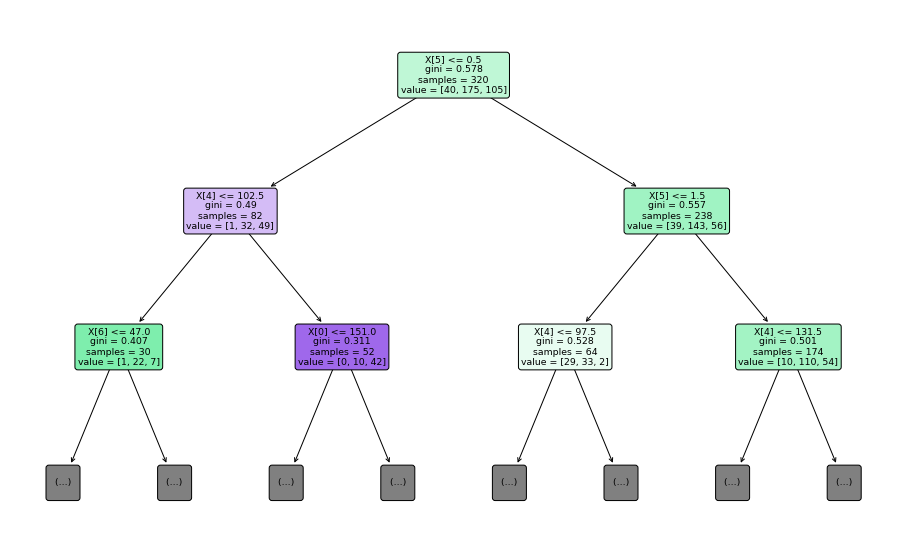

In [47]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dt,rounded=True,filled=True,max_depth=2)
plt.show()

## Hyperparameter tweaking by using GridsearchCV

In [49]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(estimator = dt,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
grid_model.fit(x_train,y_train)
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.675


In [50]:
dt_model_cv=DecisionTreeClassifier(max_depth=4,min_samples_leaf=4)
dt_model_cv.fit(x_train,y_train)
y_pred=dt_model_cv.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6875


## Feature important plot

In [51]:
feature_dt=x_train.columns
len(feature_dt)

10

In [52]:
imp_feature_dt=dt.feature_importances_
len(imp_feature_dt)

10

In [53]:
data_dt=pd.DataFrame({'feature':feature_dt,'imp_feature':imp_feature_dt})
data_dt=data_dt.sort_values('imp_feature')

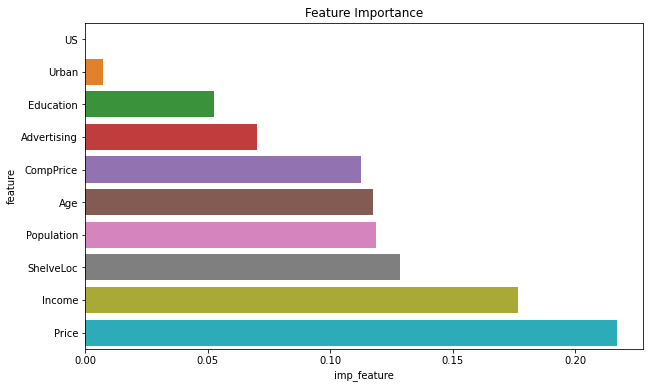

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_dt)
plt.show()

The plot clearly shows that some of the features donot contribute much for model building

Hence the accuracy can be imporved by droping those insignificant features

## Feature selection by feature importance for Decision tree

In [57]:
from sklearn.feature_selection import SelectFromModel

In [58]:
selector=SelectFromModel(estimator=DecisionTreeClassifier())
selector.fit(x_train,y_train)

SelectFromModel(estimator=DecisionTreeClassifier())

In [60]:
selector.get_support()

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False])

In [61]:
len(x_train.columns)

10

In [62]:
feature=x_train.columns[selector.get_support()]
len(x_train.columns[selector.get_support()])

6

Out of 10 features only 5 features is selscted for building models

In [63]:
x_train_dt=selector.transform(x_train)
x_test_dt=selector.transform(x_test)

In [64]:
dt_model_imp=DecisionTreeClassifier().fit(x_train_dt,y_train)
y_pred_imp=dt_model_imp.predict(x_test_dt)

In [65]:
print(accuracy_score(y_test,y_pred_imp))

0.725


In [66]:
print(confusion_matrix(y_test,y_pred_imp))

[[ 4  4  1]
 [ 8 35  3]
 [ 0  6 19]]


In [67]:
print(classification_report(y_test,y_pred_imp))

              precision    recall  f1-score   support

        High       0.33      0.44      0.38         9
         Low       0.78      0.76      0.77        46
      Medium       0.83      0.76      0.79        25

    accuracy                           0.73        80
   macro avg       0.65      0.66      0.65        80
weighted avg       0.74      0.72      0.73        80



In [68]:
imp_feature=dt_model_imp.feature_importances_
imp_feature

array([0.1913789 , 0.17127826, 0.11713337, 0.25655628, 0.12830594,
       0.13534725])

In [69]:
data_imp=pd.DataFrame({'feature':feature,'imp_feature':imp_feature})
data_imp=data_imp.sort_values('imp_feature')

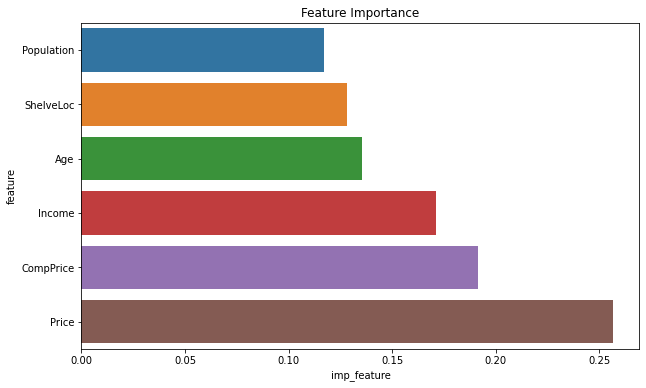

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_imp)
plt.show()

# Recursive feature elimination

In [73]:
from sklearn.feature_selection import RFE

In [74]:
selector_rfe=RFE(DecisionTreeClassifier())
selector_rfe.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier())

In [76]:
selector_rfe.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
       False])

In [77]:
feature_rfe=x_train.columns[selector_rfe.get_support()]
feature_rfe

Index(['CompPrice', 'Income', 'Price', 'ShelveLoc', 'Age'], dtype='object')

In [78]:
len(x_train.columns[selector_rfe.get_support()])

5

Here 5 out of 10 feature is selscted as an important feature

In [79]:
x_train_rfe=selector_rfe.transform(x_train)
x_test_rfe=selector_rfe.transform(x_test)

In [80]:
dt_model_rfe=DecisionTreeClassifier().fit(x_train_rfe,y_train)

In [81]:
y_pred_rfe=dt_model_rfe.predict(x_test_rfe)

In [82]:
print(accuracy_score(y_test,y_pred_rfe))

0.675


In [83]:
print(confusion_matrix(y_test,y_pred_rfe))

[[ 3  6  0]
 [ 4 36  6]
 [ 0 10 15]]


In [84]:
print(classification_report(y_test,y_pred_rfe))

              precision    recall  f1-score   support

        High       0.43      0.33      0.38         9
         Low       0.69      0.78      0.73        46
      Medium       0.71      0.60      0.65        25

    accuracy                           0.68        80
   macro avg       0.61      0.57      0.59        80
weighted avg       0.67      0.68      0.67        80



In [85]:
imp_feature_rfe=dt_model_rfe.feature_importances_

In [86]:
data_rfe=pd.DataFrame({'feature':feature_rfe,'imp_feature':imp_feature_rfe})
data_rfe=data_rfe.sort_values('imp_feature')

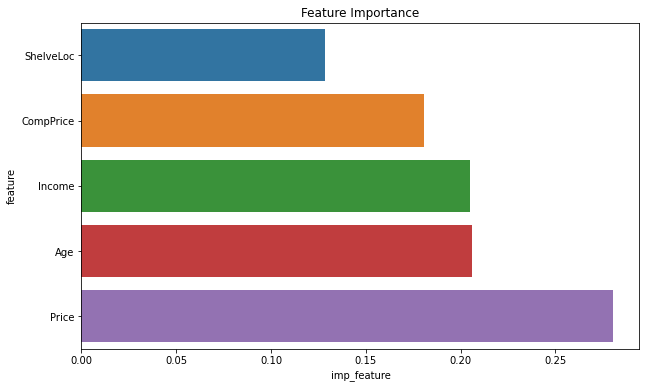

In [87]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_rfe)
plt.show()

Inference

Price is the feature which affect/contibute more for the sales

Competerior price fallows price which affect the most